# 1.0 Exploratory Dataset Analysis

## 1.1 Import modules

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random
import cv2

## 1.2 Add column names to DataFrames

In [2]:
# Load the annotations
df_train_raw = pd.read_csv("../data/SKU110K_dataset/annotations/annotations_train.csv")
df_val_raw = pd.read_csv("../data/SKU110K_dataset/annotations/annotations_val.csv")
df_test_raw = pd.read_csv("../data/SKU110K_dataset/annotations/annotations_test.csv")

In [3]:
columns = ["image_name","x1","y1","x2","y2","class","image_width","image_height"]

In [4]:
df_train_raw.columns = columns
df_val_raw.columns = columns
df_test_raw.columns = columns

In [6]:
df_train_raw.head()

,image_name,x1,y1,x2,y2,class,image_width,image_height
0,train_0.jpg,1268,1923,1365,2209,object,3024,3024
1,train_0.jpg,1135,2074,1261,2166,object,3024,3024
2,train_0.jpg,1045,2085,1122,2258,object,3024,3024
3,train_0.jpg,976,2036,1040,2177,object,3024,3024
4,train_0.jpg,863,2048,937,2194,object,3024,3024


## 1.3 Number of images

In [7]:
## Number of images
print(f"Number of images in train set: {len(df_train_raw['image_name'].unique())}")
print(f"Number of images in validation set: {len(df_val_raw['image_name'].unique())}")
print(f"Number of images in test set: {len(df_test_raw['image_name'].unique())}")

## 1.4 Number of bounding boxes
print(f"Number of bounding boxes in train set: {len(df_train_raw)}")
print(f"Number of bounding boxes in validation set: {len(df_val_raw)}")
print(f"Number of bounding boxes in test set: {len(df_test_raw)}")

Number of images in train set: 8219
Number of images in validation set: 588
Number of images in test set: 2936
Number of bounding boxes in train set: 1208481
Number of bounding boxes in validation set: 90967
Number of bounding boxes in test set: 431545


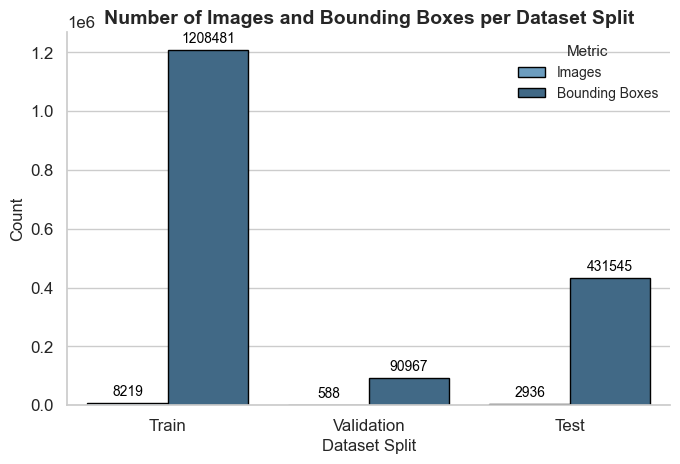

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Datos base
data = {
    'Set': ['Train', 'Validation', 'Test'],
    'Images': [
        len(df_train_raw['image_name'].unique()),
        len(df_val_raw['image_name'].unique()),
        len(df_test_raw['image_name'].unique())
    ],
    'Bounding Boxes': [
        len(df_train_raw),
        len(df_val_raw),
        len(df_test_raw)
    ]
}

df_counts = pd.DataFrame(data)

# Reorganizar los datos para graficar en una sola figura
df_melted = df_counts.melt(id_vars='Set', var_name='Type', value_name='Count')

# Estilo moderno
sns.set_theme(style="whitegrid", font_scale=1.1)
palette = sns.color_palette("Blues_d", n_colors=2)

# Crear gráfica
plt.figure(figsize=(7,5))
ax = sns.barplot(
    data=df_melted, 
    x='Set', 
    y='Count', 
    hue='Type', 
    palette=palette,
    edgecolor='black'
)

# Etiquetas numéricas en cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', fontsize=10, color='black', padding=3)

# Título y ejes
plt.title('Number of Images and Bounding Boxes per Dataset Split', fontsize=14, weight='bold')
plt.xlabel('Dataset Split', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Metric', title_fontsize=11, fontsize=10, loc='upper right', frameon=False)

# Quitar bordes innecesarios
sns.despine()
plt.tight_layout()
plt.show()



## 1.3 Show random image

In [12]:
images_path = '../data/SKU110K_dataset/images/train/'

images = os.listdir(images_path)

rdm_image = random.choice(images)

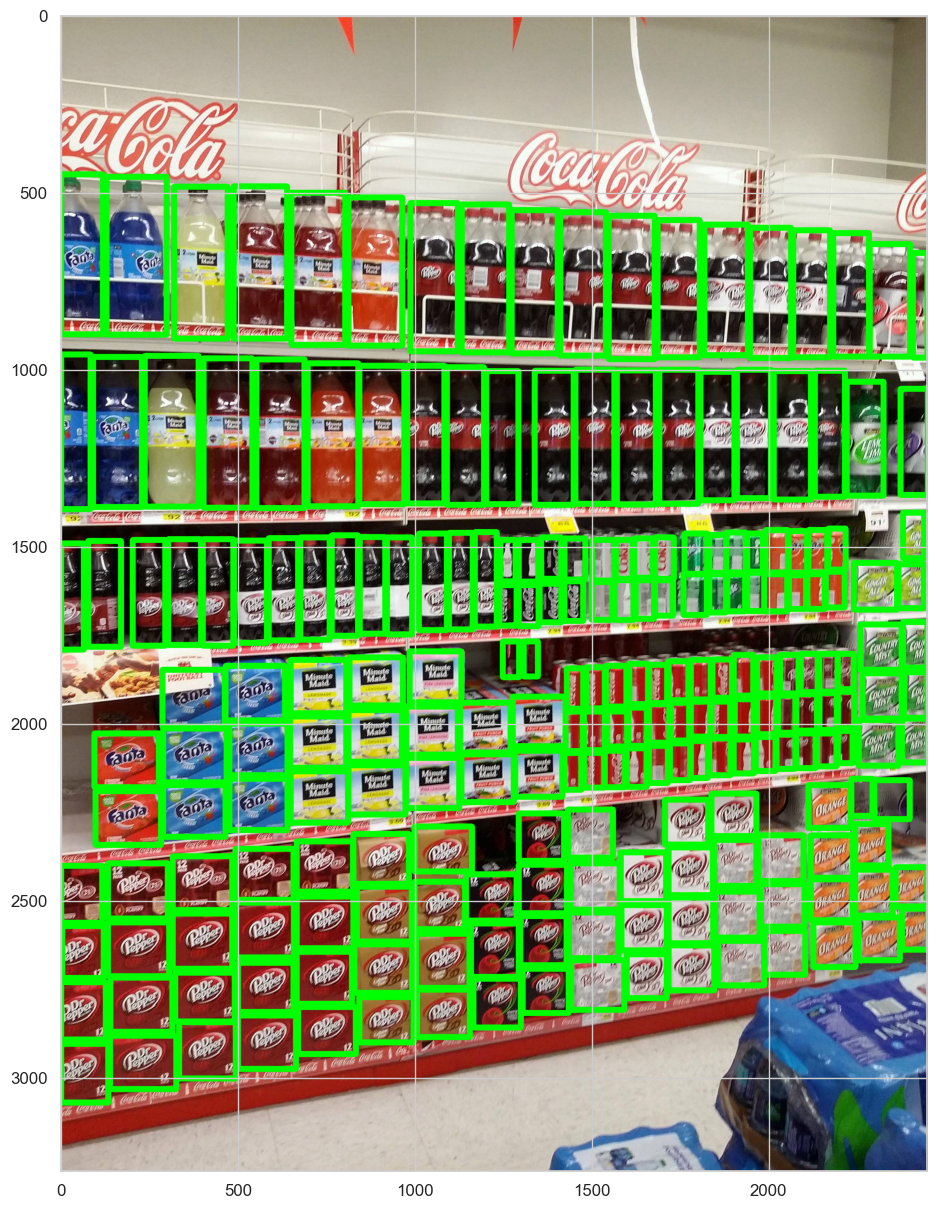

In [17]:
# Get bounding boxes
gt_bb = df_train_raw.loc[df_train_raw['image_name'] == rdm_image]

# Load a random image
img = cv2.imread(os.path.join(images_path, rdm_image))
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Bounding boxes color
color = (0, 255, 0)
   
# Line thickness of -1 px
# Thickness of -1 will fill the entire shape
thickness = 15

for _, bb in gt_bb.iterrows():
    # Start coordinate, here (100, 50)
    # represents the top left corner of rectangle
    start_point = (bb['x1'], bb['y1'])
   
    # Ending coordinate, here (125, 80)
    # represents the bottom right corner of rectangle
    end_point = (bb['x2'], bb['y2'])
   
    # Using cv2.rectangle() method
    # Draw a rectangle of black color of thickness -1 px
    img_rgb = cv2.rectangle(img_rgb, start_point, end_point, color, thickness)
    

# Display
fig = plt.figure(figsize = (15,15))
plt.imshow(img_rgb)
plt.show()